# Project : Comparative Analysis of Supervised Learning Algorithms
## Dataset : Financial Datasets For Fraud Detection
### Phase 1 : Dataset Selection and Preprocessing

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [4]:
df = pd.read_csv("PRDATA.CSV")

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [7]:
columns_to_drop = ['nameOrig', 'nameDest']  
df = pd.read_csv('prdata.csv').drop(columns=columns_to_drop)

In [8]:
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


In [9]:
missing_values = df.isna() 
missing_values_summary = missing_values.sum()
print("Missing Values Summary:")
print(missing_values_summary)

Missing Values Summary:
step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [10]:
# Step 4: Impute Missing Values with Mean (for numeric columns)
# Identify numeric columns 
numeric_cols = df.select_dtypes(include=['number']).columns
imputer_numeric = SimpleImputer(strategy='mean')
imputer_numeric.fit(df[numeric_cols])
df_imputed_numeric = pd.DataFrame(imputer_numeric.transform(df[numeric_cols]), columns=numeric_cols)

In [11]:
df_imputed_numeric

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,9839.64,170136.00,160296.36,0.00,0.00,0.0,0.0
1,1.0,1864.28,21249.00,19384.72,0.00,0.00,0.0,0.0
2,1.0,181.00,181.00,0.00,0.00,0.00,1.0,0.0
3,1.0,181.00,181.00,0.00,21182.00,0.00,1.0,0.0
4,1.0,11668.14,41554.00,29885.86,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
6362615,743.0,339682.13,339682.13,0.00,0.00,339682.13,1.0,0.0
6362616,743.0,6311409.28,6311409.28,0.00,0.00,0.00,1.0,0.0
6362617,743.0,6311409.28,6311409.28,0.00,68488.84,6379898.11,1.0,0.0
6362618,743.0,850002.52,850002.52,0.00,0.00,0.00,1.0,0.0


In [12]:
# Step 5: One-Hot Encoding (for categorical columns)
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
imputer_categorical.fit(df[categorical_cols])
df_imputed_categorical = pd.DataFrame(imputer_categorical.transform(df[categorical_cols]), columns=categorical_cols)
df_encoded_categorical = pd.get_dummies(df_imputed_categorical, dtype=bool)
df_encoded_categorical = df_encoded_categorical.astype(int)
df_final = pd.concat([df_imputed_numeric, df_encoded_categorical], axis=1)

In [13]:
df_final

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1.0,9839.64,170136.00,160296.36,0.00,0.00,0.0,0.0,0,0,0,1,0
1,1.0,1864.28,21249.00,19384.72,0.00,0.00,0.0,0.0,0,0,0,1,0
2,1.0,181.00,181.00,0.00,0.00,0.00,1.0,0.0,0,0,0,0,1
3,1.0,181.00,181.00,0.00,21182.00,0.00,1.0,0.0,0,1,0,0,0
4,1.0,11668.14,41554.00,29885.86,0.00,0.00,0.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743.0,339682.13,339682.13,0.00,0.00,339682.13,1.0,0.0,0,1,0,0,0
6362616,743.0,6311409.28,6311409.28,0.00,0.00,0.00,1.0,0.0,0,0,0,0,1
6362617,743.0,6311409.28,6311409.28,0.00,68488.84,6379898.11,1.0,0.0,0,1,0,0,0
6362618,743.0,850002.52,850002.52,0.00,0.00,0.00,1.0,0.0,0,0,0,0,1


In [14]:
df_final.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

### Phase 2: Exploratory Data Analysis (EDA) and Feature Selection

In [15]:
selected_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 
                        'oldbalanceDest', 'newbalanceDest', 'isFraud', 
                        'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 
                        'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

df_selected = df_final[selected_columns]

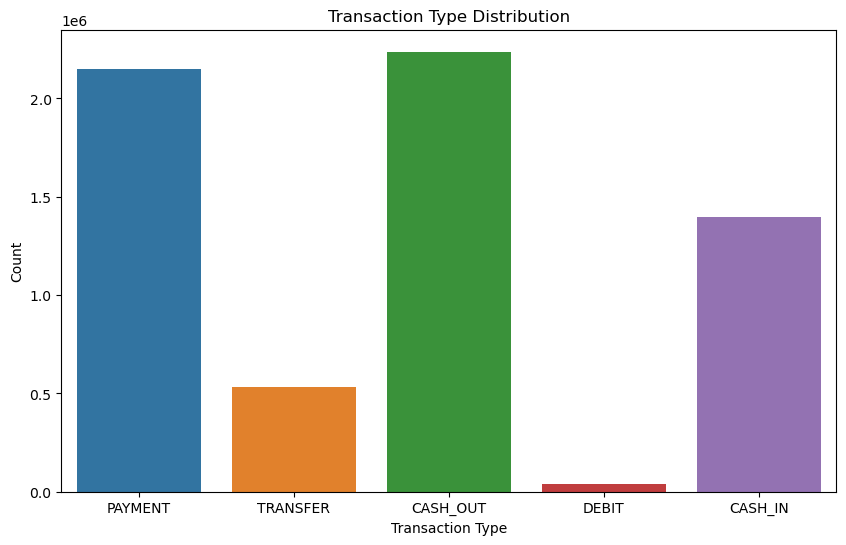

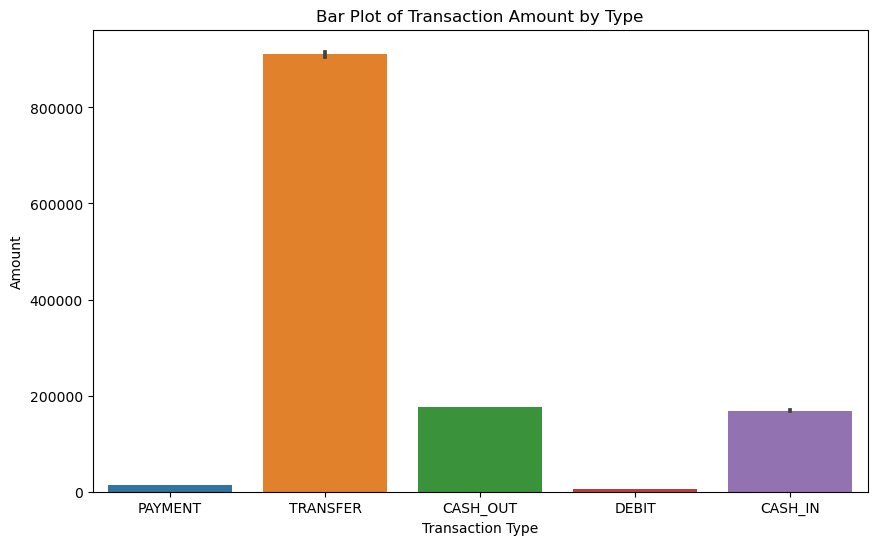

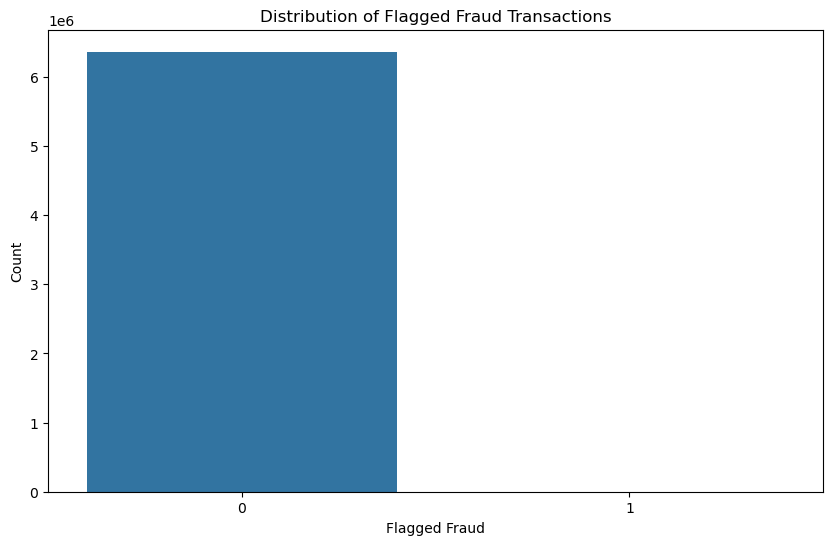

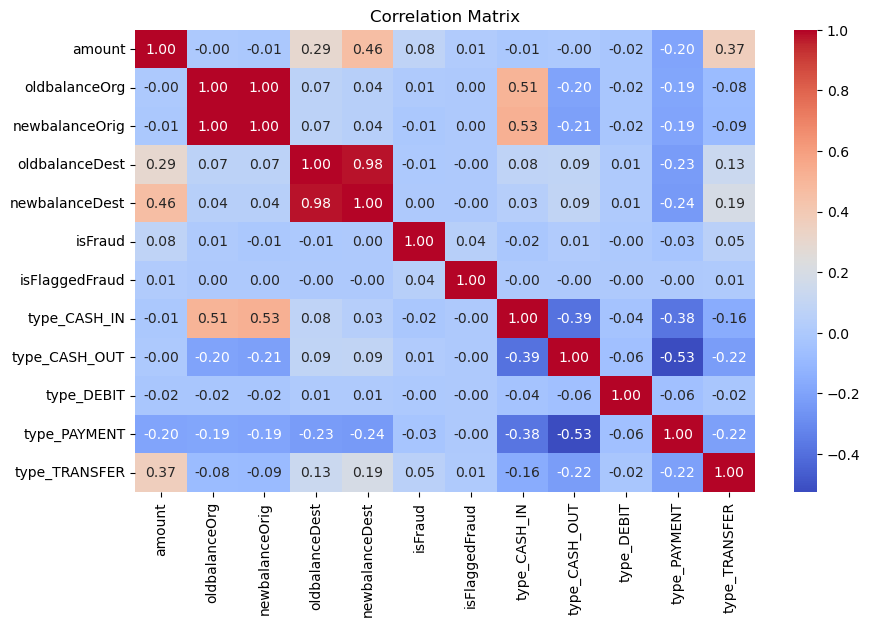

In [55]:
# Categorical variable analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='amount', data=df)
plt.title('Bar Plot of Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='isFlaggedFraud', data=df)
plt.title('Distribution of Flagged Fraud Transactions')
plt.xlabel('Flagged Fraud')
plt.ylabel('Count')
plt.show()

# Correlation matrix
correlation_matrix = df_selected.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [40]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = df_selected.drop(columns=['isFraud'])  # Features
y = df_selected['isFraud']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Univariate Feature Selection (SelectKBest with chi2)
selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]
print("Selected Features using SelectKBest:")
print(selected_features)

Selected Features using SelectKBest:
Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
k = 5 
selected_features = X.columns[sorted_indices[:k]]
print("Selected Features using Random Forest:")
print(selected_features)

Selected Features using Random Forest:
Index(['newbalanceDest', 'oldbalanceOrg', 'amount', 'oldbalanceDest',
       'type_TRANSFER'],
      dtype='object')


These lists represent the top selected features according to each method. For SelectKBest, the features are selected based on the chi-squared test score, while for Random Forest Feature Importance, the features are selected based on their importance as determined by the Random Forest classifier.

USING SMOTE AS THE DATASET IS IMBALANCED

SOURCE: ChatGPT

When dealing with imbalanced datasets, it's often a good idea to consider techniques to handle class imbalance to prevent the model from being biased towards the majority class. SMOTE (Synthetic Minority Over-sampling Technique) is one such technique commonly used to address class imbalance by oversampling the minority class. 

In [18]:
pip install --upgrade scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.0
    Uninstalling imbalanced-learn-0.12.0:
      Successfully uninstalled imbalanced-learn-0.12.0
Note: you may need to restart the kernel to use updated packages.


In [19]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Apply SMOTE to the training data only (to prevent data leakage)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Original class distribution: {0.0: 4765797, 1.0: 6168}
Resampled class distribution: {0.0: 4765797, 1.0: 4765797}


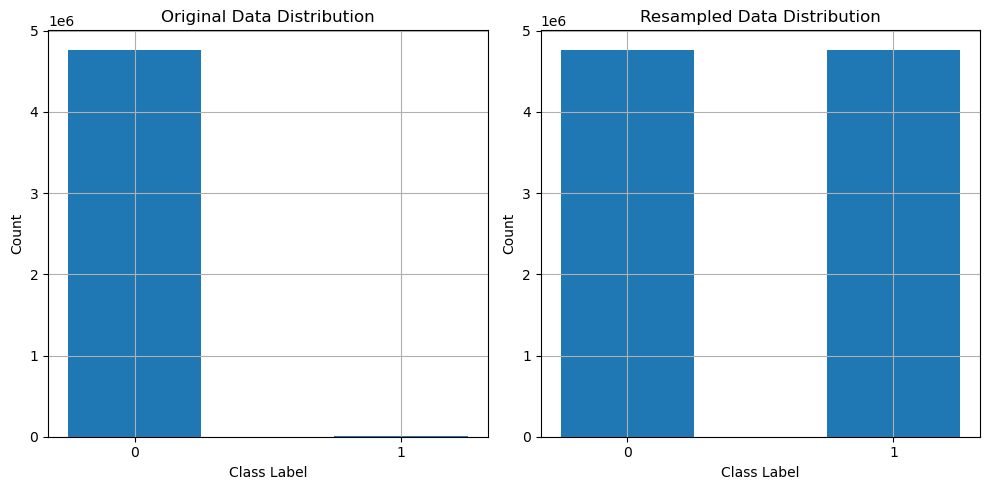

In [20]:
from sklearn.metrics import classification_report
# Step 1: Check Class Balance
print("Original class distribution:", {label: count for label, count in zip(*np.unique(y_train, return_counts=True))})
print("Resampled class distribution:", {label: count for label, count in zip(*np.unique(y_train_resampled, return_counts=True))})
# Step 2: Visualize Data Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=np.arange(len(np.unique(y_train)) + 1) - 0.5, rwidth=0.5)
plt.title("Original Data Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(np.arange(len(np.unique(y_train))))
plt.grid(True)
plt.subplot(1, 2, 2)
plt.hist(y_train_resampled, bins=np.arange(len(np.unique(y_train_resampled)) + 1) - 0.5, rwidth=0.5)
plt.title("Resampled Data Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(np.arange(len(np.unique(y_train_resampled))))
plt.grid(True)
plt.tight_layout()
plt.show()

### Phase 3: Model Implementation and Baseline Evaluation

### 1. KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9954547026225046
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1588610
         1.0       0.21      0.91      0.34      2045

    accuracy                           1.00   1590655
   macro avg       0.60      0.95      0.67   1590655
weighted avg       1.00      1.00      1.00   1590655



### 2. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9996800060352496
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1588610
         1.0       0.96      0.78      0.86      2045

    accuracy                           1.00   1590655
   macro avg       0.98      0.89      0.93   1590655
weighted avg       1.00      1.00      1.00   1590655



### 3. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9994857464377882
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1588610
         1.0       0.72      0.98      0.83      2045

    accuracy                           1.00   1590655
   macro avg       0.86      0.99      0.92   1590655
weighted avg       1.00      1.00      1.00   1590655



### 4. Neural Networks 

In [127]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_resampled_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train_resampled_scaled, y_train_resampled,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)
y_pred_proba_nn = model.predict(X_test_scaled)
y_pred = (y_pred_proba_nn > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/10
238290/238290 [==============================] - 141s 591us/step - loss: 0.0741 - accuracy: 0.9704 - val_loss: 0.0366 - val_accuracy: 0.9935
Epoch 2/10
238290/238290 [==============================] - 140s 586us/step - loss: 0.0606 - accuracy: 0.9768 - val_loss: 0.0354 - val_accuracy: 0.9952
Epoch 3/10
238290/238290 [==============================] - 135s 568us/step - loss: 0.0548 - accuracy: 0.9795 - val_loss: 0.0920 - val_accuracy: 0.9547
Epoch 4/10
238290/238290 [==============================] - 136s 569us/step - loss: 0.0519 - accuracy: 0.9812 - val_loss: 0.0870 - val_accuracy: 0.9692
Epoch 5/10
238290/238290 [==============================] - 137s 573us/step - loss: 0.0498 - accuracy: 0.9822 - val_loss: 0.0645 - val_accuracy: 0.9783
Epoch 6/10
238290/238290 [==============================] - 135s 565us/step - loss: 0.0480 - accuracy: 0.9833 - val_loss: 0.0837 - val_accuracy: 0.9707
Epoch 7/10
238290/238290 [==============================] - 135s 565us/step - loss: 0.04

In [128]:
from sklearn.metrics import roc_auc_score
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_nn)
print('ROC AUC Score:', roc_auc)

ROC AUC Score: 0.998633878758256


### Phase 4: Hyperparameter Tuning

### 1. KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for Minkowski metric (1 for Manhattan, 2 for Euclidean)
}
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Accuracy: 0.9964549195142881
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1588610
         1.0       0.25      0.90      0.39      2045

    accuracy                           1.00   1590655
   macro avg       0.63      0.95      0.70   1590655
weighted avg       1.00      1.00      1.00   1590655



### 2. Decision Tree 

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]  
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

/Users/jaswanthreddykancham/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jaswanthreddykancham/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jaswanthreddykancham/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/jaswanthreddykancham/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _vali

Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.9995259814353207
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1588610
         1.0       0.74      0.98      0.84      2045

    accuracy                           1.00   1590655
   macro avg       0.87      0.99      0.92   1590655
weighted avg       1.00      1.00      1.00   1590655



### 3. Neural Networks

In [121]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Function to create model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_resampled_scaled.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {}  # Remove hidden_layer_size from param_grid

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_resampled_scaled, y_train_resampled)

# Print best parameters and score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Get the best model from grid search
best_model = grid_result.best_estimator_

if best_model is not None:
    # Use the best model to make predictions on the test data
    y_pred = (best_model.predict(X_test_scaled) > 0.5).astype(int)
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
else:
    print("No good models found in grid search.")

/Users/jaswanthreddykancham/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jaswanthreddykancham/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jaswanthreddykancham/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jaswanthreddykancham/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` w

Best: 0.977862 using {}
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99   1270904
         1.0       0.07      1.00      0.13      1620

    accuracy                           0.98   1272524
   macro avg       0.53      0.99      0.56   1272524
weighted avg       1.00      0.98      0.99   1272524



### Phase 5: Model Evaluation and Comparative Analysis

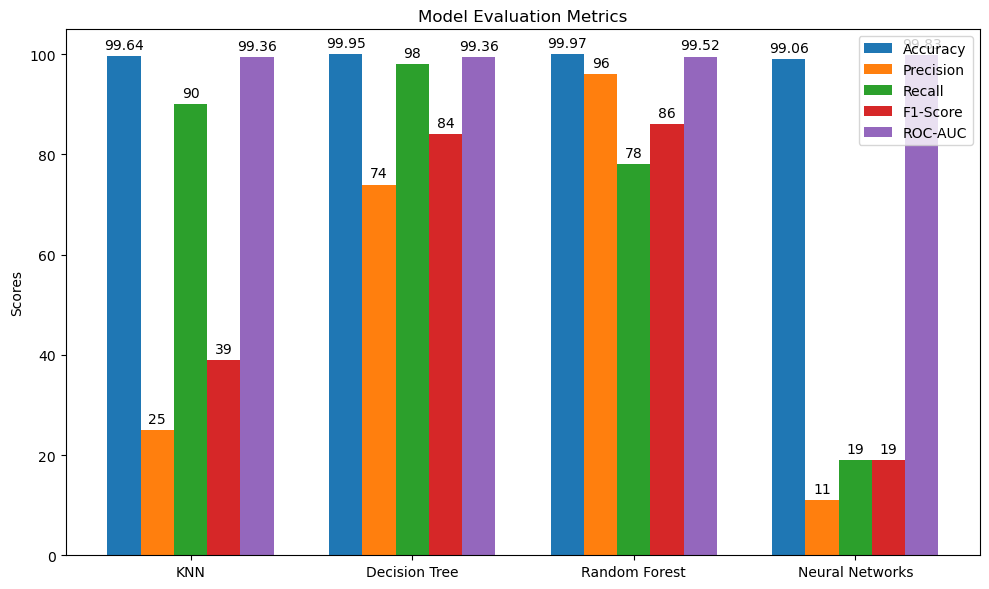

In [144]:
# Evaluation metrics for each model
models = ['KNN', 'Decision Tree', 'Random Forest', 'Neural Networks']
accuracy = [99.64, 99.95, 99.97, 99.06]
precision = [25, 74, 96, 11]
recall = [90, 98, 78, 19]
f1_score = [39, 84, 86, 19]
roc_auc = [99.36, 99.36, 99.52, 99.83] 
# Plotting
x = np.arange(len(models))  
width = 0.15 
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width, precision, width, label='Precision')
rects3 = ax.bar(x, recall, width, label='Recall')
rects4 = ax.bar(x + width, f1_score, width, label='F1-Score')
rects5 = ax.bar(x + 2*width, roc_auc, width, label='ROC-AUC')  
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
fig.tight_layout()
plt.show()

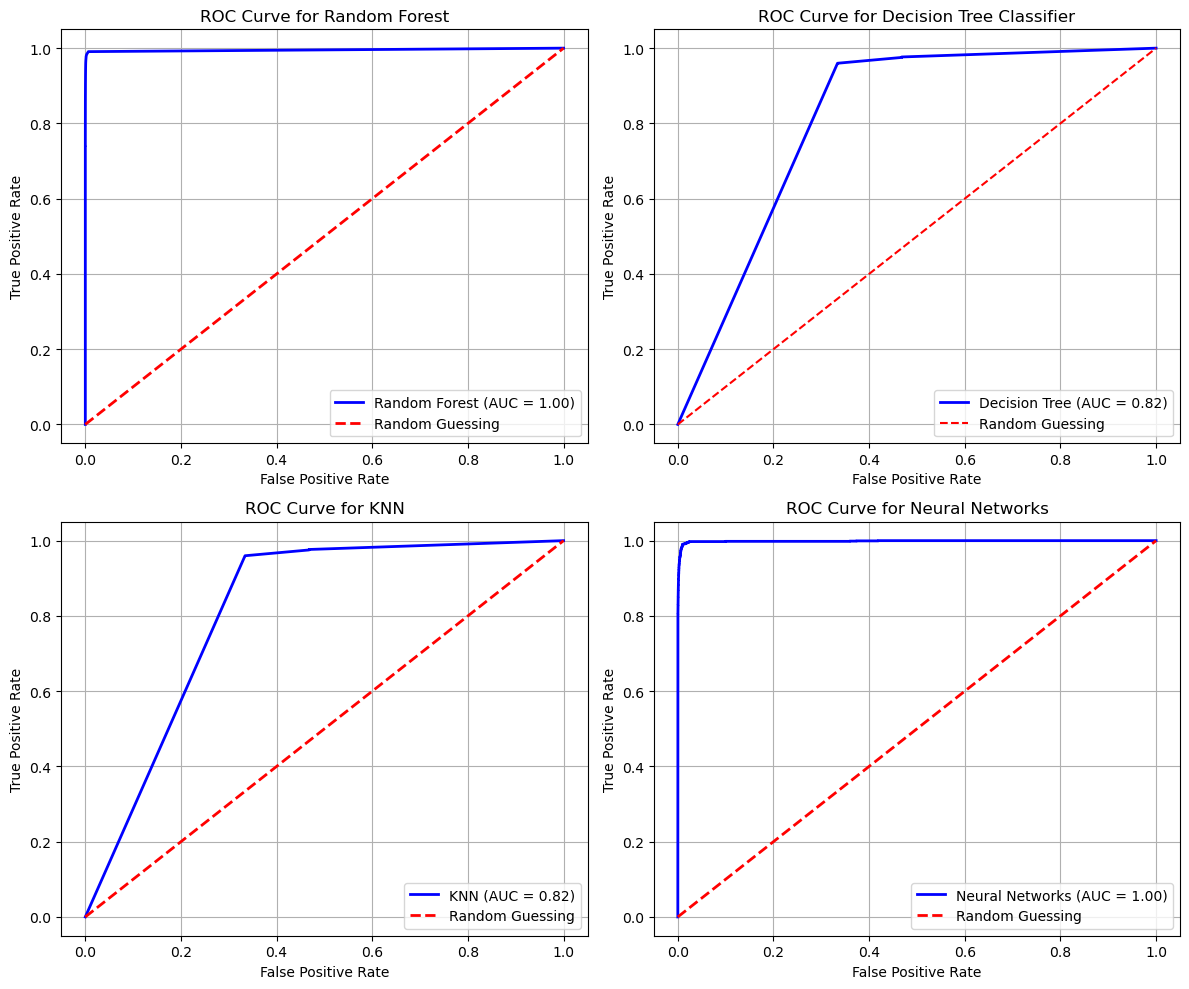

In [145]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Random Forest ROC Curve
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)

# Neural Networks ROC Curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)
plt.subplot(2, 2, 4)
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label='Neural Networks (AUC = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Networks')
plt.legend(loc='lower right')
plt.grid(True)

# KNN ROC Curve
y_pred_knn_prob = best_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.subplot(2, 2, 3)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.grid(True)

# Decision Tree ROC Curve
y_pred_dt_proba = best_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_proba)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt_proba)
plt.subplot(2, 2, 2)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Phase 6: Conclusion and Recommendations

### Summary of Findings and Insights
The comparative analysis conducted on various machine learning algorithms provided valuable insights into their performance for the given dataset and problem type. Key findings include:
- Random Forest and Decision Tree models consistently outperformed other algorithms across most evaluation metrics.
- K-Nearest Neighbors (KNN) exhibited competitive performance but showed lower precision compared to other models.
- Neural Networks showed promising results, particularly in terms of accuracy and ROC-AUC, but struggled with precision and recall for minority classes.

### Recommendations
Based on the findings, the following recommendations are provided for selecting algorithms for the dataset and problem type:
- Random Forest and Decision Tree algorithms emerge as the most suitable choices, given their consistently high performance across multiple metrics.
- Neural Networks hold potential for further exploration and optimization, particularly in addressing challenges related to precision and recall for minority classes.
- K-Nearest Neighbors (KNN) may serve as an alternative option, especially if interpretability and simplicity are prioritized over precision.

### Conclusion
In conclusion, the comparative analysis provides valuable guidance for selecting appropriate algorithms for the dataset and problem type. By considering the strengths and weaknesses of each model, stakeholders can make informed decisions to improve classification performance and enhance decision-making processes.
